In [31]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor

In [32]:
data = pd.read_csv('housing-train-data-6628a4723213d886993351.csv')
data

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [33]:
data.describe()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16336.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,10295.498789,-119.564046,35.626523,28.624516,2644.170603,539.319540,1435.017260,501.135962,3.864091,206509.251453
std,5941.973488,2.005033,2.139150,12.597980,2213.946369,425.207704,1158.151967,385.650673,1.893244,115225.957661
min,0.000000,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,5178.750000,-121.790000,33.930000,18.000000,1446.000000,296.000000,788.000000,280.000000,2.562500,119400.000000
50%,10263.500000,-118.490000,34.250000,29.000000,2116.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000
75%,15438.250000,-118.010000,37.710000,37.000000,3154.000000,647.000000,1738.000000,606.000000,4.733225,264500.000000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16336 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


In [35]:
doublon = data[data.duplicated()]
doublon

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [36]:
data.sort_values(by='total_bedrooms')

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11282,12286,-116.95,33.86,1.0,6.0,2.0,8.0,2.0,1.6250,55000.0,INLAND
14210,12458,-114.62,33.62,26.0,18.0,3.0,5.0,3.0,0.5360,275000.0,INLAND
9523,20248,-119.23,34.25,28.0,26.0,3.0,29.0,9.0,8.0000,275000.0,NEAR OCEAN
10664,13606,-117.27,34.17,16.0,30.0,3.0,49.0,8.0,4.6250,250000.0,INLAND
8596,16888,-122.37,37.60,26.0,15.0,3.0,11.0,3.0,5.0480,350000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...,...
16002,17202,-119.73,34.44,38.0,1729.0,NaN,801.0,395.0,3.1364,357500.0,NEAR OCEAN
16089,17041,-122.28,37.51,33.0,4719.0,NaN,1980.0,757.0,6.1064,405000.0,NEAR OCEAN
16214,4591,-118.28,34.06,42.0,2472.0,NaN,3795.0,1179.0,1.2254,162500.0,<1H OCEAN
16228,9942,-122.23,38.17,45.0,350.0,NaN,225.0,72.0,1.8942,216700.0,NEAR BAY


In [37]:
data1 = data.dropna()
data1

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [38]:
data2 = data1.drop('Unnamed: 0', axis=1)
data2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [39]:
data2.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000
mean,-119.564780,35.627727,28.622551,2644.361349,539.319540,1434.176787,500.926604,3.863597,206442.492287
std,2.005294,2.139979,12.607315,2217.697233,425.207704,1158.712057,385.466770,1.892362,115264.335238
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1447.000000,296.000000,788.000000,280.000000,2.562500,119375.000000
50%,-118.490000,34.250000,29.000000,2115.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000
75%,-118.010000,37.720000,37.000000,3149.250000,647.000000,1733.000000,606.000000,4.733050,264325.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


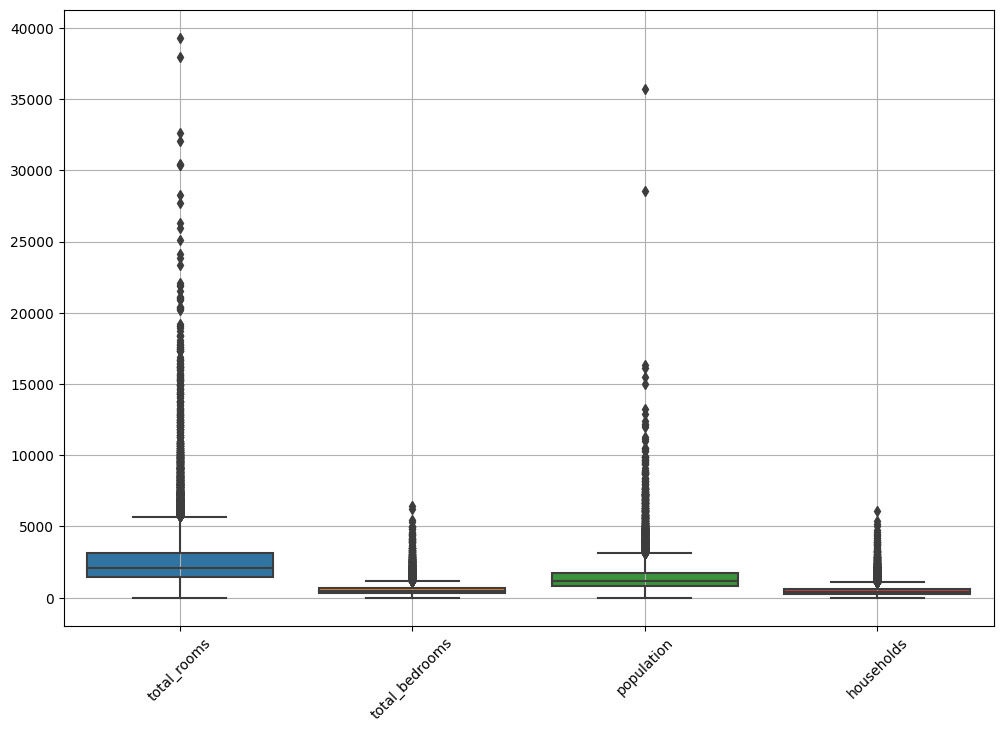

In [40]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data2[['total_rooms', 'total_bedrooms', 'population', 'households']])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()







In [41]:
# Spécifier la valeur que vous recherchez dans la colonne 1
valeur_recherchee = 25000

# Utiliser loc[] pour filtrer les données en fonction de la valeur recherchée dans la colonne 1
ligne = data2.loc[data2['total_rooms'] >= valeur_recherchee]
ligne



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4185,-121.44,38.43,3.0,39320.0,6210.0,16305.0,5358.0,4.9516,153700.0,INLAND
7471,-117.42,33.35,14.0,25135.0,4819.0,35682.0,4769.0,2.5729,134400.0,<1H OCEAN
8684,-117.12,33.52,4.0,30401.0,4957.0,13251.0,4339.0,4.5841,212300.0,<1H OCEAN
10059,-121.92,37.53,7.0,28258.0,3864.0,12203.0,3701.0,8.4045,451100.0,<1H OCEAN
10716,-118.46,34.40,12.0,25957.0,4798.0,10475.0,4490.0,4.5420,195300.0,<1H OCEAN
12510,-117.87,34.04,7.0,27700.0,4179.0,15037.0,4072.0,6.6288,339700.0,<1H OCEAN
12726,-117.27,33.68,8.0,26322.0,4072.0,9360.0,3361.0,5.3238,228900.0,<1H OCEAN
13049,-117.20,33.58,2.0,30450.0,5033.0,9419.0,3197.0,4.5936,174300.0,<1H OCEAN
13152,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,<1H OCEAN
13564,-118.78,34.16,9.0,30405.0,4093.0,12873.0,3931.0,8.0137,399200.0,NEAR OCEAN


In [42]:
#Ligne à potentiellement supprimer :
4185
13922
7471
14503
8684
13049
13152
13564
14503

14503

In [43]:
# Calculer une nouvelle colonne avec des valeurs spécifiques
data2['avg_people_households'] = data2['population'] / data2['households']

data2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_people_households
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND,3.350120
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN,2.535294
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND,4.350467
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN,2.629956
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND,3.037634
...,...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND,2.980000
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY,2.469432
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND,2.811189
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN,3.293661


In [44]:
data2['avg_rooms_households'] = data2['total_rooms'] / data2['households']

data2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_people_households,avg_rooms_households
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND,3.350120,4.443645
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN,2.535294,5.976471
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND,4.350467,4.088785
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN,2.629956,2.740088
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND,3.037634,5.166667
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND,2.980000,5.860000
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY,2.469432,5.163755
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND,2.811189,5.899767
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN,3.293661,3.591203


In [45]:
island = data2.loc[data2['ocean_proximity']== "ISLAND"]
island


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_people_households,avg_rooms_households
407,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND,2.247734,5.060423
1375,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND,2.131250,6.225000
7900,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND,2.552204,5.473318
16497,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND,2.545139,7.385417


In [79]:
house52 = data2.loc[data2['housing_median_age']> 51]
house52

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_people_households,avg_rooms_households,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,avg_bedrooms_households
16,-122.43,37.75,52.0,2700.0,595.0,1181.0,575.0,3.5750,396800.0,2.053913,4.695652,0,0,0,1,0,1.034783
49,-121.49,38.56,52.0,1844.0,392.0,667.0,353.0,3.0033,103500.0,1.889518,5.223796,0,1,0,0,0,1.110482
73,-121.88,37.35,52.0,1704.0,418.0,1336.0,411.0,2.8167,183500.0,3.250608,4.145985,1,0,0,0,0,1.017032
102,-122.53,37.97,52.0,1560.0,451.0,700.0,419.0,2.5125,270800.0,1.670644,3.723150,0,0,0,1,0,1.076372
128,-122.49,37.79,52.0,3146.0,478.0,1143.0,455.0,6.1407,500001.0,2.512088,6.914286,0,0,0,1,0,1.050549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16437,-118.32,34.06,52.0,983.0,246.0,578.0,204.0,5.7393,500001.0,2.833333,4.818627,1,0,0,0,0,1.205882
16439,-122.42,37.74,52.0,1786.0,427.0,856.0,394.0,3.0833,328100.0,2.172589,4.532995,0,0,0,1,0,1.083756
16443,-119.02,35.39,52.0,191.0,52.0,106.0,49.0,2.0455,72500.0,2.163265,3.897959,0,1,0,0,0,1.061224
16490,-122.41,37.74,52.0,831.0,175.0,415.0,159.0,1.9464,249000.0,2.610063,5.226415,0,0,0,1,0,1.100629


In [47]:
valeur_abberante = data2.loc[[4185,13922,7471,14503,8684,13049,13152,13564,14503]]
valeur_abberante

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_people_households,avg_rooms_households
4185,-121.44,38.43,3.0,39320.0,6210.0,16305.0,5358.0,4.9516,153700.0,INLAND,3.043113,7.338559
13922,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0,<1H OCEAN,3.106957,7.311043
7471,-117.42,33.35,14.0,25135.0,4819.0,35682.0,4769.0,2.5729,134400.0,<1H OCEAN,7.482072,5.270497
14503,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0,<1H OCEAN,4.696810,5.364518
8684,-117.12,33.52,4.0,30401.0,4957.0,13251.0,4339.0,4.5841,212300.0,<1H OCEAN,3.053929,7.006453
13049,-117.20,33.58,2.0,30450.0,5033.0,9419.0,3197.0,4.5936,174300.0,<1H OCEAN,2.946200,9.524554
13152,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,<1H OCEAN,3.070693,6.347327
13564,-118.78,34.16,9.0,30405.0,4093.0,12873.0,3931.0,8.0137,399200.0,NEAR OCEAN,3.274739,7.734673
14503,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0,<1H OCEAN,4.696810,5.364518


In [63]:
populationmax = data2['population'].sum()
populationmax

23428712.0

In [64]:
data3 = data2.drop(data2[data2['median_house_value'] > 500000].index)
data3

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_people_households,avg_rooms_households,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,avg_bedrooms_households
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,3.350120,4.443645,0,1,0,0,0,1.134293
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,2.535294,5.976471,1,0,0,0,0,1.026471
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,4.350467,4.088785,0,1,0,0,0,1.000000
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,2.629956,2.740088,1,0,0,0,0,1.008811
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,3.037634,5.166667,0,1,0,0,0,1.002688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,2.980000,5.860000,0,1,0,0,0,1.112000
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,2.469432,5.163755,0,0,0,1,0,1.100437
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,2.811189,5.899767,0,1,0,0,0,1.074592
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,3.293661,3.591203,1,0,0,0,0,1.086675


In [74]:
data2['avg_bedrooms_households'] = data2['total_bedrooms'] / data2['households']

data2.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_people_households,avg_rooms_households,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,avg_bedrooms_households
count,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000,16336.000000
mean,-119.564780,35.627727,28.622551,2644.361349,539.319540,1434.176787,500.926604,3.863597,206442.492287,3.081596,5.414750,0.441969,0.317703,0.000245,0.110492,0.129591,1.095054
std,2.005294,2.139979,12.607315,2217.697233,425.207704,1158.712057,385.466770,1.892362,115264.335238,10.992168,2.287588,0.496636,0.465598,0.015647,0.313512,0.335863,0.451935
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.692308,0.846154,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
25%,-121.790000,33.930000,18.000000,1447.000000,296.000000,788.000000,280.000000,2.562500,119375.000000,2.429528,4.441091,0.000000,0.000000,0.000000,0.000000,0.000000,1.006226
50%,-118.490000,34.250000,29.000000,2115.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000,2.820179,5.225568,0.000000,0.000000,0.000000,0.000000,0.000000,1.048676
75%,-118.010000,37.720000,37.000000,3149.250000,647.000000,1733.000000,606.000000,4.733050,264325.000000,3.289510,6.047464,1.000000,1.000000,0.000000,0.000000,0.000000,1.099455
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1243.333333,132.533333,1.000000,1.000000,1.000000,1.000000,1.000000,34.066667


In [84]:
unpeubizare = data2.loc[data2['avg_bedrooms_households']> 3]
unpeubizare

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_people_households,avg_rooms_households,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,avg_bedrooms_households
233,-120.09,39.40,17.0,1076.0,283.0,171.0,64.0,2.1250,83900.0,2.671875,16.812500,0,1,0,0,0,4.421875
234,-119.57,37.94,17.0,346.0,130.0,51.0,20.0,3.4861,137500.0,2.550000,17.300000,0,1,0,0,0,6.500000
364,-120.06,39.15,22.0,2213.0,372.0,98.0,42.0,1.1912,170000.0,2.333333,52.690476,0,1,0,0,0,8.857143
622,-120.25,39.34,9.0,2739.0,555.0,294.0,110.0,3.1842,162500.0,2.672727,24.900000,0,1,0,0,0,5.045455
1394,-118.99,37.63,10.0,7744.0,1573.0,483.0,224.0,3.2917,231800.0,2.156250,34.571429,0,1,0,0,0,7.022321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16201,-120.77,40.65,11.0,2635.0,667.0,280.0,132.0,1.7214,118300.0,2.121212,19.962121,0,1,0,0,0,5.053030
16221,-117.19,34.27,16.0,7961.0,1147.0,879.0,280.0,5.2146,255200.0,3.139286,28.432143,0,1,0,0,0,4.096429
16293,-120.08,38.80,34.0,1988.0,511.0,36.0,15.0,4.6250,162500.0,2.400000,132.533333,0,1,0,0,0,34.066667
16296,-120.16,39.14,21.0,2484.0,460.0,309.0,144.0,3.9722,127800.0,2.145833,17.250000,0,1,0,0,0,3.194444


In [93]:
unpeubizare2 = data3.loc[data3['avg_people_households']> 5]
unpeubizare2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_people_households,avg_rooms_households,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,avg_bedrooms_households
21,-118.04,33.93,36.0,1045.0,239.0,1165.0,230.0,3.1979,161800.0,5.065217,4.543478,1,0,0,0,0,1.039130
62,-121.40,38.66,50.0,880.0,150.0,1148.0,148.0,2.5062,112500.0,7.756757,5.945946,0,1,0,0,0,1.013514
66,-118.01,33.91,32.0,2722.0,571.0,2541.0,462.0,4.2305,221400.0,5.500000,5.891775,1,0,0,0,0,1.235931
83,-117.90,33.74,24.0,1435.0,494.0,3171.0,504.0,3.0833,151700.0,6.291667,2.847222,1,0,0,0,0,0.980159
121,-118.42,34.25,37.0,1545.0,341.0,1909.0,352.0,3.6791,148100.0,5.423295,4.389205,1,0,0,0,0,0.968750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16301,-122.28,37.80,52.0,96.0,31.0,191.0,34.0,0.7500,162500.0,5.617647,2.823529,0,0,0,1,0,0.911765
16311,-118.07,33.89,35.0,1145.0,274.0,1651.0,265.0,3.1250,120300.0,6.230189,4.320755,1,0,0,0,0,1.033962
16343,-118.08,33.89,35.0,1071.0,290.0,1412.0,274.0,3.1917,114900.0,5.153285,3.908759,1,0,0,0,0,1.058394
16380,-121.84,37.35,20.0,3375.0,867.0,4610.0,860.0,2.6894,182200.0,5.360465,3.924419,1,0,0,0,0,1.008140


In [108]:
index_to_drop2 = data3.loc[data3['avg_people_households']> 5].index
data4 = data3.drop(index_to_drop2)
data4.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_people_households,avg_rooms_households,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,avg_bedrooms_households
count,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000,15300.000000
mean,-119.570028,35.661327,28.332745,2649.380523,544.905817,1438.319216,505.936667,3.680135,192960.182810,2.897709,5.366863,0.432614,0.333595,0.000261,0.107582,0.125948,1.096622
std,2.012665,2.158623,12.544531,2219.362184,427.712207,1127.566858,387.307936,1.565630,97999.235705,0.673648,2.306100,0.495455,0.471512,0.016167,0.309862,0.331801,0.465153
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.692308,0.846154,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
25%,-121.770000,33.930000,18.000000,1454.750000,300.000000,796.000000,284.000000,2.528800,116400.000000,2.436842,4.434248,0.000000,0.000000,0.000000,0.000000,0.000000,1.006362
50%,-118.520000,34.270000,28.000000,2118.000000,439.000000,1175.500000,414.000000,3.460500,174400.000000,2.824349,5.192033,0.000000,0.000000,0.000000,0.000000,0.000000,1.048780
75%,-118.000000,37.730000,37.000000,3148.250000,652.000000,1740.000000,609.000000,4.587875,250000.000000,3.280445,5.975610,1.000000,1.000000,0.000000,0.000000,0.000000,1.099057
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,15.000100,500000.000000,5.000000,132.533333,1.000000,1.000000,1.000000,1.000000,1.000000,34.066667


In [109]:
index_to_drop = data3[data3['avg_bedrooms_households'] > 3].index
data4 = data3.drop(index_to_drop)
data4.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_people_households,avg_rooms_households,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,avg_bedrooms_households
count,15498.000000,15498.000000,15498.000000,15498.000000,15498.000000,15498.000000,15498.000000,15498.000000,15498.000000,15498.000000,15498.000000,15498.000000,15498.000000,15498.000000,15498.000000,15498.000000,15498.000000
mean,-119.560432,35.638375,28.420893,2623.017873,540.445993,1454.852497,504.433153,3.670444,192388.798426,3.110713,5.242832,0.438379,0.328494,0.000258,0.106982,0.125887,1.072768
std,2.009204,2.149083,12.531356,2214.612060,426.970267,1171.064569,387.618645,1.562980,97708.095336,11.279433,1.278289,0.496204,0.469681,0.016064,0.309100,0.331733,0.157425
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.750000,0.846154,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
25%,-121.760000,33.930000,18.000000,1437.000000,297.000000,803.000000,283.000000,2.523975,116400.000000,2.448501,4.409303,0.000000,0.000000,0.000000,0.000000,0.000000,1.005885
50%,-118.490000,34.260000,28.000000,2101.000000,436.000000,1184.000000,412.000000,3.446150,173700.000000,2.842197,5.169437,0.000000,0.000000,0.000000,0.000000,0.000000,1.048123
75%,-117.990000,37.720000,37.000000,3119.750000,647.000000,1757.000000,608.000000,4.572550,248400.000000,3.317066,5.951899,1.000000,1.000000,0.000000,0.000000,0.000000,1.098085
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500000.000000,1243.333333,22.222222,1.000000,1.000000,1.000000,1.000000,1.000000,2.993333


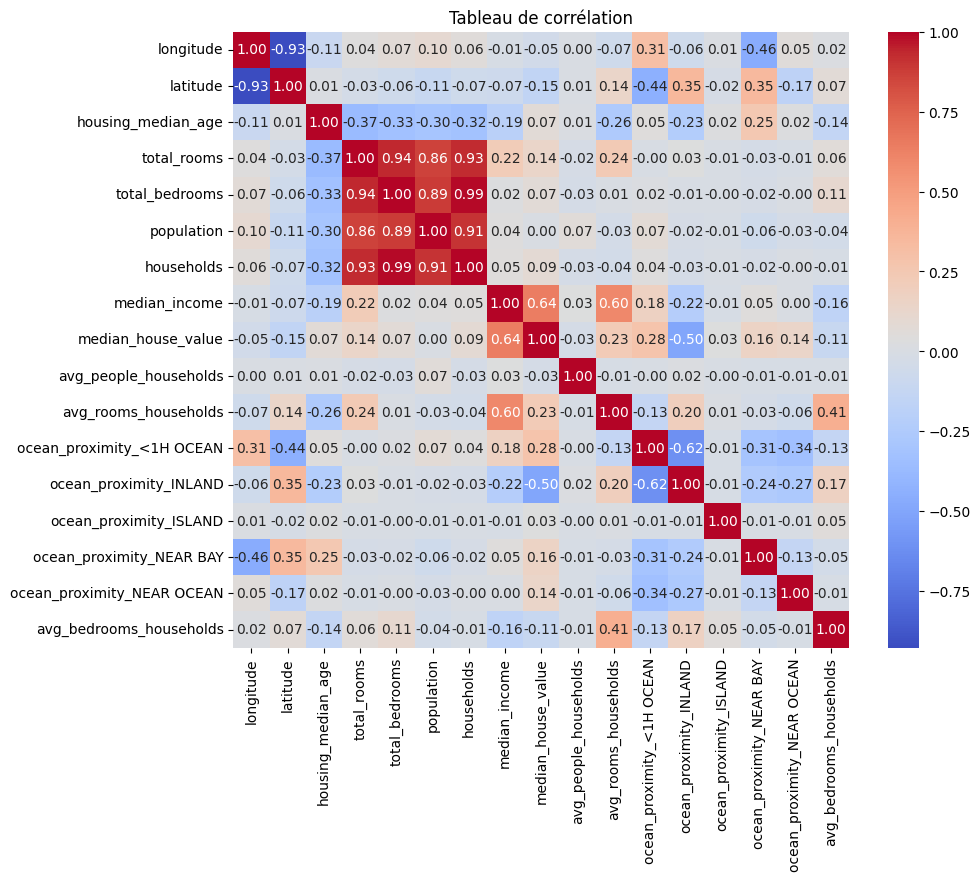

In [101]:
matrice_correlation = data4.corr()

# Créer un tableau de corrélation avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matrice_correlation, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Tableau de corrélation')
plt.show()

In [111]:
X = data4[['avg_rooms_households','avg_bedrooms_households','avg_people_households','longitude','latitude',  'housing_median_age','total_bedrooms','population', 'total_rooms','households','median_income']]
X

,avg_rooms_households,avg_bedrooms_households,avg_people_households,longitude,latitude,housing_median_age,total_bedrooms,population,total_rooms,households,median_income
0,4.443645,1.134293,3.350120,-119.84,36.77,6.0,473.0,1397.0,1853.0,417.0,1.4817
1,5.976471,1.026471,2.535294,-117.80,33.68,8.0,349.0,862.0,2032.0,340.0,6.9133
2,4.088785,1.000000,4.350467,-120.19,36.60,25.0,214.0,931.0,875.0,214.0,1.5536
3,2.740088,1.008811,2.629956,-118.32,34.10,31.0,229.0,597.0,622.0,227.0,1.5284
4,5.166667,1.002688,3.037634,-121.23,37.79,21.0,373.0,1130.0,1922.0,372.0,4.0815
...,...,...,...,...,...,...,...,...,...,...,...
16507,5.860000,1.112000,2.980000,-121.90,39.59,20.0,278.0,745.0,1465.0,250.0,3.0625
16508,5.163755,1.100437,2.469432,-122.25,38.11,49.0,504.0,1131.0,2365.0,458.0,2.6133
16509,5.899767,1.074592,2.811189,-121.22,38.92,19.0,461.0,1206.0,2531.0,429.0,4.4958
16510,3.591203,1.086675,3.293661,-118.14,34.16,39.0,840.0,2546.0,2776.0,773.0,2.5750


In [112]:
y = data4['median_house_value']

X_multi = X 
X_train_multi, X_test_multi, y_train, y_test = train_test_split(X_multi, y, test_size=0.3, random_state=1)
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train)
multi_score = model_multi.score(X_test_multi, y_test)
print("Multiple Regression R^2 Score:", multi_score)


Multiple Regression R^2 Score: 0.5997036434470693


In [113]:
model_rf = RandomForestRegressor(n_estimators=175, random_state=102)  # Vous pouvez ajuster les hyperparamètres selon vos besoins
model_rf.fit(X_train_multi, y_train)
rf_score = model_rf.score(X_test_multi, y_test)
print("Random Forest R^2 Score:", rf_score)

Random Forest R^2 Score: 0.7670726589036134


In [114]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score

final_data = data4

# Préparation des données
X = final_data.drop('median_house_value', axis=1)
y = final_data['median_house_value']

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)

# Identification des types de caractéristiques
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Transformateurs pour les caractéristiques numériques
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Transformateurs pour les caractéristiques catégorielles
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Préprocesseur avec ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Pipeline complet
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

# Configuration des paramètres pour le GridSearchCV
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 10],
    'knn__weights': ['uniform', 'distance']
}

# Création de l'objet GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', verbose=1)

# Entraînement du GridSearchCV
grid_search.fit(X_train, y_train)

# Meilleurs paramètres trouvés
print("Meilleurs paramètres: ", grid_search.best_params_)

# Meilleur score R^2 obtenu
print("Meilleur score R^2: ", grid_search.best_score_)

# Prédiction avec le meilleur modèle trouvé
y_pred = grid_search.predict(X_test)

# Calcul de R^2
r_squared = r2_score(y_test, y_pred)
print("R^2 score avec KNN :", r_squared)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Meilleurs paramètres:  {'knn__n_neighbors': 10, 'knn__weights': 'distance'}
Meilleur score R^2:  0.6464538895104892
R^2 score avec KNN : 0.6368320384920942


In [70]:
californie = data2
californie

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_people_households,avg_rooms_households,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,avg_bedrooms_households
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,3.350120,4.443645,0,1,0,0,0,1.134293
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,2.535294,5.976471,1,0,0,0,0,1.026471
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,4.350467,4.088785,0,1,0,0,0,1.000000
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,2.629956,2.740088,1,0,0,0,0,1.008811
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,3.037634,5.166667,0,1,0,0,0,1.002688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,2.980000,5.860000,0,1,0,0,0,1.112000
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,2.469432,5.163755,0,0,0,1,0,1.100437
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,2.811189,5.899767,0,1,0,0,0,1.074592
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,3.293661,3.591203,1,0,0,0,0,1.086675


In [72]:
data2 = pd.get_dummies(data2, columns=['ocean_proximity'])

KeyError: "None of [Index(['ocean_proximity'], dtype='object')] are in the [columns]"

In [115]:
# Supposons que votre DataFrame nettoyé soit 'cleaned_data'
data4.to_csv('data4.csv', index=False)

In [73]:
data3.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_people_households,avg_rooms_households,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,avg_bedrooms_households
count,15579.000000,15579.000000,15579.000000,15579.000000,15579.000000,15579.000000,15579.000000,15579.000000,15579.000000,15579.000000,15579.000000,15579.000000,15579.000000,15579.000000,15579.000000,15579.000000,15579.000000
mean,-119.559224,35.648207,28.369921,2627.159253,541.169395,1449.225432,502.612299,3.669100,192178.175557,3.106688,5.351934,0.436100,0.331857,0.000257,0.106425,0.125361,1.096222
std,2.008307,2.154148,12.532431,2218.491065,427.563687,1170.855743,387.548213,1.563477,97674.554231,11.250246,2.294402,0.495916,0.470895,0.016022,0.308391,0.331138,0.461850
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.692308,0.846154,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
25%,-121.750000,33.930000,18.000000,1438.000000,297.000000,797.000000,282.000000,2.523800,116300.000000,2.445396,4.413540,0.000000,0.000000,0.000000,0.000000,0.000000,1.006221
50%,-118.490000,34.270000,28.000000,2102.000000,436.000000,1181.000000,411.000000,3.443000,173300.000000,2.837972,5.175896,0.000000,0.000000,0.000000,0.000000,0.000000,1.048611
75%,-117.990000,37.730000,37.000000,3124.000000,648.000000,1753.000000,607.000000,4.571400,248100.000000,3.314037,5.964578,1.000000,1.000000,0.000000,0.000000,0.000000,1.099264
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500000.000000,1243.333333,132.533333,1.000000,1.000000,1.000000,1.000000,1.000000,34.066667
